# Python для анализа данных

*Алла Тамбовцева, Валентин Бирюков НИУ ВШЭ*

## Работа с таблицами. Основы работы с датафреймами в pandas

В этой и последующих лекциях мы будем работать с таблицами. В социальных науках термины «база данных» и «таблица» часто используются как синонимы. Вообще, между этими терминами есть существенная разница, так как база данных – это набор таблиц, связанных друг с другом (при определённых условиях можно думать о ней как о файле Excel с разными листами). Давайте для простоты считать эти термины эквивалентными, основы работы с «настоящими» базами данных (SQL, PyMongo) мы обсуждать не будем. Кроме того, в качестве синонима слова таблица мы будем использовать слово датафрейм как кальку с термина data frame.

Библиотека pandas используется для удобной и более эффективной работы с таблицами. Её функционал достаточно разнообразен, но давайте начнем с каких-то базовых функций и методов.

Для начала импортируем саму библиотеку.

In [1]:
import pandas as pd

Здесь мы использовали такой приём: импортировали библиотеку и присвоили ей сокращённое имя, которое будет использоваться в пределах данного ipynb-файла. Чтобы не писать перед каждой библиотечной функцией длинное `pandas`. и не импортировать сразу все функции из этой библиотеки, мы сократили название до `pd`, и в дальнейшем Python будет понимать, что мы имеем в виду. Можно было бы сократить и до `p`, но тогда есть риск забыть про это и создать переменную с таким же именем, что в какой-то момент приведёт к проблемам. К тому же `pd` – распространенное сокращение.

### Загрузка таблицы из файла и описание переменных
А теперь давайте загрузим какую-нибудь реальную базу данных из файла. Библиотека `pandas` достаточно гибкая, она позволяет загружать данные из файлов разных форматов. Пока остановимся на самом простом – файле csv, что расшифровывается как *comma separated values*. Столбцы в таком файле по умолчанию отделяются друг от друга запятой. Например, такая таблица

In [3]:
pd.DataFrame([[1, 4, 9], [4, 8, 6]])

,0,1,2
0,1,4,9
1,4,8,6


сохраненная в формате csv без названий строк и столбцов будет выглядеть так:

Но разделитель столбцов в таблице может быть и другим, например, точкой с запятой:

В таких случаях нам потребуется дополнительно выставлять параметр `sep = ";"`, чтобы Python понимал, как правильно отделять один столбец от другого.  Пока загрузим файл по ссылке: пропишем путь к нему внутри функции `read_csv()` из библиотеки `pandas`. Плюс, сделаем так, чтобы первый столбец (с индексом 0) был использован в качестве названий строк (строки будут иметь не номер от 0 до N, а названия, которые мы захотим, важно только, чтобы они все были уникальными, без повторов):

In [37]:
df = pd.read_csv("scores2.csv", index_col = 0)

Иногда такой подход может быть полезен. Представьте, что все переменные в таблице, кроме *id*, измерены в количественной шкале, и мы планируем реализовать на них статистический метод, который работает исключительно с числовыми данными. Если мы просто выкинем столбец с *id*, мы потеряем информацию о наблюдении, если мы его оставим, нам придется собирать в отдельную таблицу показатели, к которым будем применять метод, так как сохраненный в исходной таблице текст будет мешать. Если же мы назовем строки в соответствии с *id*, мы убьем сразу двух зайцев: избавимся от столбца с текстом и не потеряем информацию о наблюдении (код, имя респондента, название страны и прочее).

В файле `scores2.csv` сохранены оценки студентов-политологов по ряду курсов. Оценки реальные, взяты из кумулятивного рейтинга, но имена студентов зашифрованы – вместо них задействованы номера студенческих билетов. Посмотрим на датафрейм:

In [36]:
df

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ024,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1
М141БПЛТЛ072,10,9,8,10,9,8,9,8.0,8,10,9,7.0,8,8.0,9,9,0
М141БПЛТЛ020,8,7,7,6,9,10,8,8.0,7,7,9,7.0,8,6.0,8,9,1
М141БПЛТЛ026,7,10,8,7,10,7,9,8.0,8,8,8,8.0,8,7.0,7,8,0
М141БПЛТЛ073,7,9,8,8,9,8,9,8.0,8,9,9,7.0,7,6.0,10,9,1


Так как в нашем случае таблица не очень большая, Python вывел её на экран полностью. Если строк или столбцов было бы слишком много, Python вывел бы несколько первых и последних, а в середине бы поставил многоточие.

**Описание показателей (переменных):**

* `id` – номер студенческого билета;
* `catps` – оценка по курсу *Категории политической науки*;
* `mstat` – оценка по курсу *Математика и статистика*;
* `soc` – оценка по курсу *Социология*;
* `econ` – оценка по курсу *Экономика*;
* `eng` – оценка по курсу *Английский язык*;
* `polth` – оценка по курсу *История политических учений*;
* `mstat2` – оценка по курсу *Математика и статистика (часть 2)*;
* `phist` – оценка по курсу *Политическая история*;
* `law` – оценка по курсу *Право*;
* `phil` – оценка по курсу *Философия*;
* `polsoc` – оценка по курсу *Политическая социология*;
* `ptheo` – оценка по курсу *Политическая теория*;
* `preg` – оценка по курсу *Политическая регионалистика*;
* `compp` – оценка по курсу *Сравнительная политика*;
* `game` – оценка по курсу *Теория игр*;
* `wpol` – оценка по курсу *Мировая политика и международные отношения*;
* `male` – пол (1 ‒ мужской, 0 ‒ женский).

Получим сводную информацию по таблице:

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, М141БПЛТЛ024 to 13051038
Data columns (total 17 columns):
catps     60 non-null int64
mstat     60 non-null int64
soc       60 non-null int64
econ      60 non-null int64
eng       60 non-null int64
polth     60 non-null int64
mstat2    60 non-null int64
phist     59 non-null float64
law       60 non-null int64
phil      60 non-null int64
polsoc    60 non-null int64
ptheo     58 non-null float64
preg      60 non-null int64
compp     57 non-null float64
game      60 non-null int64
wpol      60 non-null int64
male      60 non-null int64
dtypes: float64(3), int64(14)
memory usage: 8.4+ KB


Какую информацию выдал метод `.info()`? Во-первых, он сообщил нам, что `df` является объектом `DataFrame`. Во-вторых, он вывел число строк (60 entries) и показал их индексы (0 to 59). В-третьих, он вывел число столбцов (total 18 columns). Наконец, он выдал информацию по каждому столбцу. Остановимся на этом поподробнее.

В выдаче выше представлено, сколько непустых элементов содержится в каждом столбце. Непустые элементы non-null – это всё, кроме пропущенных значений, которые кодируются особым образом (`NaN` – от *Not A Number*). В нашей таблице есть столбцы, которые заполнены неполностью. 

Далее указан тип каждого столбца, целочисленный `int64` и строковый `object`. Что означают числа в конце? Это объем памяти, который требуется для хранения.

Сводную статистическую информацию можно получить с помощью метода `.describe()`.

In [24]:
df.describe()

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,59.000000,60.000000,60.000000,60.000000,58.000000,60.000000,57.000000,60.000000,60.000000,60.000000
mean,6.700000,7.466667,7.216667,6.116667,8.350000,6.600000,7.033333,5.830508,6.866667,5.966667,7.183333,5.603448,6.700000,5.631579,6.250000,7.566667,0.450000
std,1.417804,1.578099,1.208608,1.718214,0.971195,1.638519,1.707081,1.662492,1.213856,1.850027,1.589069,1.413465,1.356716,1.422166,1.781496,1.430499,0.501692
min,4.000000,4.000000,4.000000,4.000000,6.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
25%,6.000000,6.000000,6.000000,5.000000,8.000000,6.000000,6.000000,4.000000,6.000000,4.750000,6.000000,4.250000,6.000000,4.000000,5.000000,7.000000,0.000000
50%,7.000000,7.000000,7.000000,6.000000,8.000000,6.000000,7.000000,6.000000,7.000000,5.500000,7.000000,5.000000,7.000000,5.000000,6.000000,8.000000,0.000000
75%,7.250000,9.000000,8.000000,7.000000,9.000000,8.000000,8.000000,7.000000,8.000000,7.000000,8.000000,6.000000,8.000000,7.000000,7.250000,8.250000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,10.000000,9.000000,8.000000,8.000000,10.000000,10.000000,1.000000


В случае количественных показателей этот метод возвращает таблицу с основными описательными статистиками:

* `count` – число непустых (заполненных) значений
* `mean` – среднее арифметическое
* `std` – стандартное отклонение (показатель разброса данных относительно среднего значения)
* `min` – минимальное значение
* `max` – максимальное значение
* `25%` – нижний квартиль (значение, которое 25% значений не превышают)
* `50%` – медиана (значение, которое 50% значений не превышают)
* `75%` – верхний квартиль (значение, которое 75% значений не превышают)

### Series: столбец в датафрейме

Посмотрим на структуру таблицы более внимательно. Выберем первый столбец `catps`:

In [26]:
df['catps']

id
М141БПЛТЛ024     7
М141БПЛТЛ031     8
М141БПЛТЛ075     9
М141БПЛТЛ017     9
М141БПЛТЛ069    10
М141БПЛТЛ072    10
М141БПЛТЛ020     8
М141БПЛТЛ026     7
М141БПЛТЛ073     7
М141БПЛТЛ078     6
М141БПЛТЛ060     7
М141БПЛТЛ040     6
М141БПЛТЛ065     9
М141БПЛТЛ053     6
М141БПЛТЛ015     6
М141БПЛТЛ021     8
М141БПЛТЛ018     7
М141БПЛТЛ039     9
М141БПЛТЛ036     8
М141БПЛТЛ049     6
06114043         8
М141БПЛТЛ048     8
М141БПЛТЛ034     6
М141БПЛТЛ045     5
М141БПЛТЛ033     5
М141БПЛТЛ083     5
М141БПЛТЛ008    10
М141БПЛТЛ001     6
М141БПЛТЛ038     7
М141БПЛТЛ052     7
М141БПЛТЛ011     7
М141БПЛТЛ004     7
М141БПЛТЛ010     6
М141БПЛТЛ071     6
М141БПЛТЛ035     5
М141БПЛТЛ030     7
М141БПЛТЛ070     5
М141БПЛТЛ051     8
М141БПЛТЛ046     5
М141БПЛТЛ047     5
М141БПЛТЛ063     5
М141БПЛТЛ029     6
М141БПЛТЛ064     7
М141БПЛТЛ076     7
М141БПЛТЛ062     7
М141БПЛТЛ074     5
130232038        6
М141БПЛТЛ023     7
М141БПЛТЛ054     7
М141БПЛТЛ012     6
М141БПЛТЛ006     6
М141БПЛТЛ055     6
М141БПЛТЛ

Столбец датафрейма `df` имеет особый тип *Series*. Внешне *Series* отличается от обычного списка значений, потому что, во-первых, при вызове столбца на экран выводятся не только сами элементы, но их номер (номер строки), а во-вторых, на экран выводится строка с названием столбца (`Name: id`) и его тип (`dtype: object`, текстовый). Первая особенность роднит *Series* со словарями: он представляет собой пары *ключ-значение*, то есть *номер-значение*. Вторая особенность роднит *Series* с массивами `numpy`: элементы обычно должны быть одного типа.

### Операции с таблицами

Можно вывести первые или последние строки таблицы, используя методы `.head()` и `.tail()`.

In [27]:
df.head()

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1


In [28]:
df.tail()

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ043,5,5,6,5,8,5,6,5.0,6,4,5,4.0,5,NaN,4,6,0
М141БПЛТЛ084,6,7,8,4,8,5,5,NaN,8,4,4,4.0,4,4.0,6,7,1
М141БПЛТЛ005,5,7,5,5,7,4,7,4.0,5,4,5,5.0,4,4.0,4,8,1
М141БПЛТЛ044,4,5,7,4,6,4,4,5.0,4,4,4,4.0,6,NaN,5,5,1
13051038,5,4,4,4,9,5,5,5.0,5,4,4,NaN,7,4.0,4,4,1


**Внимание:** это просто первые и последние строки таблицы «как есть». Никакой сортировки не происходит! 

По умолчанию эти методы выводят пять строк, но при желании это легко изменить. Достаточно в скобках указать желаемое число строк.

In [29]:
df.head(10) # первые 10 строк

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1
М141БПЛТЛ072,10,9,8,10,9,8,9,8.0,8,10,9,7.0,8,8.0,9,9,0
М141БПЛТЛ020,8,7,7,6,9,10,8,8.0,7,7,9,7.0,8,6.0,8,9,1
М141БПЛТЛ026,7,10,8,7,10,7,9,8.0,8,8,8,8.0,8,7.0,7,8,0
М141БПЛТЛ073,7,9,8,8,9,8,9,8.0,8,9,9,7.0,7,6.0,10,9,1


Когда таблица большая, увидеть все столбцы разом не получится. Поэтому полезно знать, как получить список названий столбцов.

In [30]:
df.columns

Index(['catps', 'mstat', 'soc', 'econ', 'eng', 'polth', 'mstat2', 'phist',
       'law', 'phil', 'polsoc', 'ptheo', 'preg', 'compp', 'game', 'wpol',
       'male'],
      dtype='object')

Обратите внимание: полученный объект не является обычным списком:

In [31]:
type(df.columns) # это Index из pandas

pandas.core.indexes.base.Index

Чтобы получить список названий, достаточно сконвертировать тип с помощью привычного `list()`: 

In [32]:
c = list(df.columns)
print(c)

['catps', 'mstat', 'soc', 'econ', 'eng', 'polth', 'mstat2', 'phist', 'law', 'phil', 'polsoc', 'ptheo', 'preg', 'compp', 'game', 'wpol', 'male']


In [33]:
a = 'Моя строчка с пробелом'

Аналогичная история со строками: 

In [38]:
df.index

Index(['М141БПЛТЛ024', 'М141БПЛТЛ031', 'М141БПЛТЛ075', 'М141БПЛТЛ017',
       'М141БПЛТЛ069', 'М141БПЛТЛ072', 'М141БПЛТЛ020', 'М141БПЛТЛ026',
       'М141БПЛТЛ073', 'М141БПЛТЛ078', 'М141БПЛТЛ060', 'М141БПЛТЛ040',
       'М141БПЛТЛ065', 'М141БПЛТЛ053', 'М141БПЛТЛ015', 'М141БПЛТЛ021',
       'М141БПЛТЛ018', 'М141БПЛТЛ039', 'М141БПЛТЛ036', 'М141БПЛТЛ049',
       '06114043', 'М141БПЛТЛ048', 'М141БПЛТЛ034', 'М141БПЛТЛ045',
       'М141БПЛТЛ033', 'М141БПЛТЛ083', 'М141БПЛТЛ008', 'М141БПЛТЛ001',
       'М141БПЛТЛ038', 'М141БПЛТЛ052', 'М141БПЛТЛ011', 'М141БПЛТЛ004',
       'М141БПЛТЛ010', 'М141БПЛТЛ071', 'М141БПЛТЛ035', 'М141БПЛТЛ030',
       'М141БПЛТЛ070', 'М141БПЛТЛ051', 'М141БПЛТЛ046', 'М141БПЛТЛ047',
       'М141БПЛТЛ063', 'М141БПЛТЛ029', 'М141БПЛТЛ064', 'М141БПЛТЛ076',
       'М141БПЛТЛ062', 'М141БПЛТЛ074', '130232038', 'М141БПЛТЛ023',
       'М141БПЛТЛ054', 'М141БПЛТЛ012', 'М141БПЛТЛ006', 'М141БПЛТЛ055',
       'М141БПЛТЛ007', 'М141БПЛТЛ050', 'М141БПЛТЛ066', 'М141БПЛТЛ043',
       'М141Б

In [43]:
len(df.index.unique()) == len(df.index)

True

### Переименование столбцов и строк

Раз названия столбцов можно вывести в виде некоторого перечня, то этот перечень можно редактировать. Посмотрим на названия столбцов ещё раз.

In [44]:
df.columns

Index(['catps', 'mstat', 'soc', 'econ', 'eng', 'polth', 'mstat2', 'phist',
       'law', 'phil', 'polsoc', 'ptheo', 'preg', 'compp', 'game', 'wpol',
       'male'],
      dtype='object')

Давайте переименуем переменную `catps` в `cps`, чтобы думать о политической науке, а не о котах :) Для этого сохраним названия в список `my_cols` и изменим в списке первый элемент:

In [46]:
my_cols = list(df.columns)
my_cols[0] = "cps"

In [49]:
df.columns = my_cols  # сохраним изменения в самой базе df
df.columns  # все обновилось!
df.head()

,cps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1


Обратите внимание: для того, чтобы изменить одно или несколько названий, совсем необязательно создавать новый список «с нуля». Достаточно определить индексы нужных элементов и поправить только необходимые названия. 

Точно так же можно было поступить со строками. Но давайте лучше попробуем внести изменения в названия всех столбцов: сделаем так, чтобы все названия столбцов начинались с большой буквы. Для начала напишем функцию, которая принимает на вход датафрейм, обращается к его столбцам и переименовывает их, делая первую букву заглавной.

**Важно:** датафреймы являются изменяемой структурой данных (да-да, как списки). Поэтому, применяя некоторые методы к объекту типа `DataFrame` или внося какие-то изменения в ссылку на него, мы меняем исходный датафрейм, и к этому надо быть готовым. Если вы не планируете вносить изменения в исходную базу, имеет смысл сделать её копию и работать с ней. Например, вот так:

In [50]:
# метод copy
df_new = df.copy()

**Обратите внимание:** создать копию обычным присваиванием не получится, код вида `df_new = df` создаст новую ссылку на датафрейм, но не новый датафрейм. Поэтому при изменении `df_new` база `df` также изменится (вспомните историю о коварстве списков).

### Выбор столбцов и строк таблицы

**Выбор столбцов по названию**

Часто удобнее всего выбирать столбец по названию. Для этого достаточно указать название столбца в квадратных скобках (и обязательно в кавычках, так как название является строкой):

In [51]:
df['mstat']

id
М141БПЛТЛ024     9
М141БПЛТЛ031    10
М141БПЛТЛ075     9
М141БПЛТЛ017     9
М141БПЛТЛ069    10
М141БПЛТЛ072     9
М141БПЛТЛ020     7
М141БПЛТЛ026    10
М141БПЛТЛ073     9
М141БПЛТЛ078     6
М141БПЛТЛ060     8
М141БПЛТЛ040     9
М141БПЛТЛ065     9
М141БПЛТЛ053     7
М141БПЛТЛ015     9
М141БПЛТЛ021     9
М141БПЛТЛ018     7
М141БПЛТЛ039     8
М141БПЛТЛ036    10
М141БПЛТЛ049     7
06114043         8
М141БПЛТЛ048     6
М141БПЛТЛ034     9
М141БПЛТЛ045     8
М141БПЛТЛ033     9
М141БПЛТЛ083     5
М141БПЛТЛ008     8
М141БПЛТЛ001     7
М141БПЛТЛ038     9
М141БПЛТЛ052     7
М141БПЛТЛ011     6
М141БПЛТЛ004     7
М141БПЛТЛ010     6
М141БПЛТЛ071     9
М141БПЛТЛ035     6
М141БПЛТЛ030     6
М141БПЛТЛ070     5
М141БПЛТЛ051     9
М141БПЛТЛ046     7
М141БПЛТЛ047     8
М141БПЛТЛ063     5
М141БПЛТЛ029     8
М141БПЛТЛ064     8
М141БПЛТЛ076     7
М141БПЛТЛ062     7
М141БПЛТЛ074     6
130232038        7
М141БПЛТЛ023     9
М141БПЛТЛ054     8
М141БПЛТЛ012     6
М141БПЛТЛ006     5
М141БПЛТЛ055     5
М141БПЛТЛ

Ещё столбец можно выбрать, не используя квадратные скобки, а просто указав его название через точку: 

In [52]:
df.mstat

id
М141БПЛТЛ024     9
М141БПЛТЛ031    10
М141БПЛТЛ075     9
М141БПЛТЛ017     9
М141БПЛТЛ069    10
М141БПЛТЛ072     9
М141БПЛТЛ020     7
М141БПЛТЛ026    10
М141БПЛТЛ073     9
М141БПЛТЛ078     6
М141БПЛТЛ060     8
М141БПЛТЛ040     9
М141БПЛТЛ065     9
М141БПЛТЛ053     7
М141БПЛТЛ015     9
М141БПЛТЛ021     9
М141БПЛТЛ018     7
М141БПЛТЛ039     8
М141БПЛТЛ036    10
М141БПЛТЛ049     7
06114043         8
М141БПЛТЛ048     6
М141БПЛТЛ034     9
М141БПЛТЛ045     8
М141БПЛТЛ033     9
М141БПЛТЛ083     5
М141БПЛТЛ008     8
М141БПЛТЛ001     7
М141БПЛТЛ038     9
М141БПЛТЛ052     7
М141БПЛТЛ011     6
М141БПЛТЛ004     7
М141БПЛТЛ010     6
М141БПЛТЛ071     9
М141БПЛТЛ035     6
М141БПЛТЛ030     6
М141БПЛТЛ070     5
М141БПЛТЛ051     9
М141БПЛТЛ046     7
М141БПЛТЛ047     8
М141БПЛТЛ063     5
М141БПЛТЛ029     8
М141БПЛТЛ064     8
М141БПЛТЛ076     7
М141БПЛТЛ062     7
М141БПЛТЛ074     6
130232038        7
М141БПЛТЛ023     9
М141БПЛТЛ054     8
М141БПЛТЛ012     6
М141БПЛТЛ006     5
М141БПЛТЛ055     5
М141БПЛТЛ

Однако такой способ не универсален. В случае, если в названии столбца используются недопустимые для переменных символы (пробелы, тире, кириллические буквы), этот метод не подойдет. 

Если нам нужно выбрать более одного столбца, то названия столбцов указываются внутри списка – появляются двойные квадратные скобки:

In [53]:
df[["soc", "polsoc"]]

,soc,polsoc
id,,
М141БПЛТЛ024,8,9
М141БПЛТЛ031,10,10
М141БПЛТЛ075,9,9
М141БПЛТЛ017,8,9
М141БПЛТЛ069,10,9
М141БПЛТЛ072,8,9
М141БПЛТЛ020,7,9
М141БПЛТЛ026,8,8
М141БПЛТЛ073,8,9


Если нам нужно несколько столбцов подряд, начиная с одного названия и заканчивая другим, можно воспользоваться методом `.loc`:    

In [54]:
df.head(3)

,cps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1


In [59]:
df.loc['М141БПЛТЛ024':'М141БПЛТЛ017', 'econ' : 'law']

,econ,eng,polth,mstat2,phist,law
id,,,,,,
М141БПЛТЛ024,8,9,8,10,8.0,7
М141БПЛТЛ031,10,10,10,10,9.0,9
М141БПЛТЛ075,10,9,10,9,8.0,9
М141БПЛТЛ017,8,9,9,10,6.0,9


Откуда в квадратных скобках взялось двоеточие? Дело в том, что метод `.loc` – более универсальный, и позволяет выбирать не только столбцы, но и строки. При этом нужные строки указываются на первом месте, а столбцы – на втором. Когда мы пишем `.loc[:, 1]`, мы сообщаем Python, что нам нужны все строки (`:`) и столбцы, начиная с `Econ` и до `Law` включительно.

**Внимание:** выбор столбцов по названиям через двоеточие очень напоминает срезы (*slices*) в списках. Но есть важное отличие. В случае текстовых названий, оба конца среза (левый и правый) включаются. Если бы срезы по названиям были бы устроены как срезы по числовым индексам, код выше выдавал бы столбцы с `Econ` и до `Phist`, не включая колонку `Law`, так как в обычных срезах правый конец исключается.

**Выбор столбцов по номеру**

Иногда может возникнуть необходимость выбрать столбец по его порядковому номеру. Например, когда названий столбцов нет как таковых или когда названия слишком длинные, а переименовывать их нежелательно. Сделать это можно с помощью метода `.iloc`:

In [55]:
df.iloc[:, 1]

id
М141БПЛТЛ024     9
М141БПЛТЛ031    10
М141БПЛТЛ075     9
М141БПЛТЛ017     9
М141БПЛТЛ069    10
М141БПЛТЛ072     9
М141БПЛТЛ020     7
М141БПЛТЛ026    10
М141БПЛТЛ073     9
М141БПЛТЛ078     6
М141БПЛТЛ060     8
М141БПЛТЛ040     9
М141БПЛТЛ065     9
М141БПЛТЛ053     7
М141БПЛТЛ015     9
М141БПЛТЛ021     9
М141БПЛТЛ018     7
М141БПЛТЛ039     8
М141БПЛТЛ036    10
М141БПЛТЛ049     7
06114043         8
М141БПЛТЛ048     6
М141БПЛТЛ034     9
М141БПЛТЛ045     8
М141БПЛТЛ033     9
М141БПЛТЛ083     5
М141БПЛТЛ008     8
М141БПЛТЛ001     7
М141БПЛТЛ038     9
М141БПЛТЛ052     7
М141БПЛТЛ011     6
М141БПЛТЛ004     7
М141БПЛТЛ010     6
М141БПЛТЛ071     9
М141БПЛТЛ035     6
М141БПЛТЛ030     6
М141БПЛТЛ070     5
М141БПЛТЛ051     9
М141БПЛТЛ046     7
М141БПЛТЛ047     8
М141БПЛТЛ063     5
М141БПЛТЛ029     8
М141БПЛТЛ064     8
М141БПЛТЛ076     7
М141БПЛТЛ062     7
М141БПЛТЛ074     6
130232038        7
М141БПЛТЛ023     9
М141БПЛТЛ054     8
М141БПЛТЛ012     6
М141БПЛТЛ006     5
М141БПЛТЛ055     5
М141БПЛТЛ

Синтаксис кода с `.iloc` несильно отличается от синтаксиса `.loc`. В чем разница? Разница заключается в том, что метод `.loc` работает с текстовыми названиями, а метод `.iloc` – с числовыми индексами. Отсюда и префикс `i` в названии (*i* – индекс, *loc* – location). Если мы попытаемся в `.iloc` указать названия столбцов, Python выдаст ошибку:

In [56]:
df.iloc[:, 'mstat': 'econ']

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [mstat] of <class 'str'>

Python пишет, что невозможно взять срез по индексам, которые имеют строковый тип (`class 'str'`), так как в квадратных скобках ожидаются числовые (целочисленные) индексы.

Если нужно выбрать несколько столбцов подряд, можно воспользоваться срезами:

In [58]:
df.iloc[3:10:2, 1:3]

,mstat,soc
id,,
М141БПЛТЛ017,9,8
М141БПЛТЛ072,9,8
М141БПЛТЛ026,10,8
М141БПЛТЛ078,6,9


Числовые срезы в `pandas` уже ничем не отличаются от списковых срезов: правый конец среза не включается. В нашем случае мы выбрали только столбцы с индексами 1 и 2.

**Выбор строк по названию**

Выбор строки по названию происходит аналогичным образом, только здесь метод `.loc` уже обязателен.

In [60]:
df.loc['М141БПЛТЛ031'] # строка для студента с номером М141БПЛТЛ031

cps        8.0
mstat     10.0
soc       10.0
econ      10.0
eng       10.0
polth     10.0
mstat2    10.0
phist      9.0
law        9.0
phil      10.0
polsoc    10.0
ptheo      9.0
preg       8.0
compp      8.0
game       9.0
wpol      10.0
male       1.0
Name: М141БПЛТЛ031, dtype: float64

При этом ставить запятую и двоеточие, показывая, что нам нужна одна строка и все столбцы, уже не нужно. Если нам нужно выбрать несколько строк подряд, то `.loc` не нужен:

In [61]:
df["М141БПЛТЛ024":'М141БПЛТЛ069']

,cps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1


Как Python понимает, что мы просим вывести именно строки с такими названиями, а не столбцы? Потому что у нас стоят одинарные квадратные скобки, а не двойные, как в случае со столбцами. (Да, в `pandas` много всяких тонкостей, но чтобы хорошо в них разбираться, нужно просто попрактиковаться и привыкнуть).

Обратите внимание: разницы между двойными и одинарными кавычками нет, строки можно вводить в любых кавычках, как в примере выше.

**Выбор строк по номеру**

В этом случае достаточно указать номер в квадратных скобках в `.iloc`:

In [66]:
df.iloc[2]['polth']

10.0

Если нужно несколько строк подряд, можно воспользоваться срезами:

In [67]:
df[1:3]  # и без iloc

,cps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1


Если нужно несколько строк не подряд, можно просто перечислить внутри списка в `.iloc`:

In [68]:
df.iloc[[1, 2, 5, 10]]

,cps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ072,10,9,8,10,9,8,9,8.0,8,10,9,7.0,8,8.0,9,9,0
М141БПЛТЛ060,7,8,7,7,9,8,8,5.0,7,5,8,5.0,7,8.0,7,9,1


### Удаление пропущенных значений

Мы уже видели, что в данном датафрейме есть строки (и столбцы) с пропущенными значениями (`NaN`). Из-за наличия этих таких значений содержащие их столбцы, даже если остальные значения являются целыми, имеют тип `float`. 

Удалим строки с пропущенными значениями из датафрейма совсем:

In [69]:
df = df.dropna()

Однако, если посмотрим на обновленный датасет, тип `float` никуда не исчез:

In [70]:
df.head()

,cps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1


Применим преобразование типов.

### Преобразование типов столбцов

Просто воспользуемся методом `.astype()`, который преобразует тип столбца в тот, который мы укажем (если это возможно, разумеется):

In [76]:
df['phist'] = df['phist'].astype(float)
df.head()

/Users/biryuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,cps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1


### Описательные статистики и базовые графики

В самом начале мы обсуждали описание базы данных с помощью метода `.describe()`. Помимо этого метода существует много методов, которые выводят отдельные статистики.

In [81]:
df.median() # медиана (для всех показателей)

cps       7.0
mstat     7.5
soc       7.0
econ      6.0
eng       8.5
polth     6.0
mstat2    7.0
phist     6.0
law       7.0
phil      6.0
polsoc    8.0
ptheo     5.0
preg      7.0
compp     5.0
game      6.0
wpol      8.0
male      0.0
dtype: float64

Можно запрашивать статистики по отдельным переменным (столбцам):

In [79]:
df.phist.mean() # среднее арифметическое Phist

5.833333333333333

Или по наблюдениям (строкам):

In [82]:
df.loc["М141БПЛТЛ023"].mean()  # средний балл студента по всем курсам

6.235294117647059

Давайте теперь построим какие-нибудь графики. Библиотеку pandas удобно использовать в сочетании с библиотекой для построения графиков `matplotlib`. Давайте её импортируем (эта библиотека должна была быть установлена на ваш компьютер вместе с Anaconda).

In [83]:
import matplotlib

In [89]:
%matplotlib inline

Построим гистограмму для оценок по теории игр.

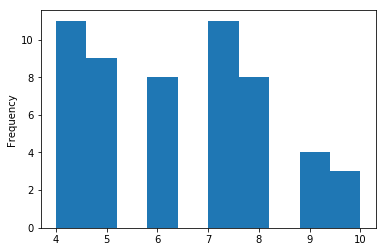

In [91]:
df["game"].plot.hist() # histogram

Что показывает этот график? Он показывает, сколько студентов получили те или иные оценки. По гистограмме видно, что больше всего по этому курсу оценок 4 и 7.

Можно поменять цвет гистограммы:

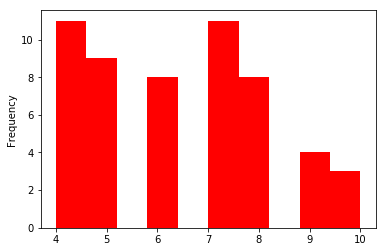

In [92]:
df["game"].plot.hist(color = "red")

А также поменять число столбцов и цвет границ столбцов:

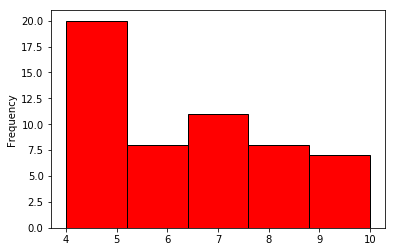

In [93]:
df["game"].plot.hist(color = "red", bins = 5, edgecolor = 'black')

Можно пытаться строить другие графики. Например, построить ящик с усами (свеча).

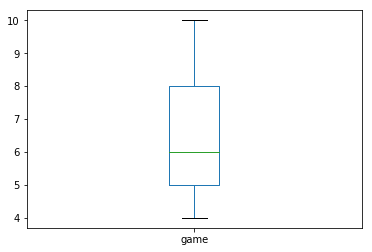

In [44]:
df["game"].plot.box() # boxplot

Этот график визуализирует основные описательные статистики переменной и отображает форму её распределения. Нижняя граница яшика – это нижний квартиль, верхняя – верхний квартиль, линяя внутри ящика – медиана. Усы графика могут откладываться по-разному: если в переменной встречаются нетипичные значения (выбросы), то границы усов совпадают с границами типичных значений, если нетипичных значений нет, границы усов соответствуют минимальному и максимальному значению переменной. Подробнее про ящик с усами см. [здесь](https://ru.wikipedia.org/wiki/%D0%AF%D1%89%D0%B8%D0%BA_%D1%81_%D1%83%D1%81%D0%B0%D0%BC%D0%B8).